In [1]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

In [2]:
!pip install tensorflow[and-cuda]

  Preparing metadata (setup.py) ... - \ done
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 7.5 MB/s eta 0:00:

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

In [4]:
data_dir = '/kaggle/input/apparel-dataset'

In [5]:
#directory tree
import os

def print_directory_tree(directory, indent=''):
    for item in os.listdir(directory):
        full_path = os.path.join(directory, item)
        if os.path.isdir(full_path):
            print(indent + item + '/')
            print_directory_tree(full_path, indent + '    ')

print_directory_tree(data_dir)

yellow_skirt/
white_pants/
white_suit/
black_pants/
white_shoes/
pink_hoodie/
brown_shoes/
blue_shirt/
green_shoes/
blue_pants/
white_shorts/
red_pants/
blue_shoes/
black_dress/
red_shirt/
red_hoodie/
green_pants/
black_shorts/
black_suit/
red_shoes/
yellow_dress/
pink_pants/
yellow_shorts/
blue_dress/
black_shirt/
red_dress/
green_shirt/
brown_hoodie/
silver_shoes/
white_dress/
pink_skirt/
green_shorts/
silver_skirt/
green_suit/
blue_shorts/
brown_pants/
black_shoes/


In [6]:
dataset_apparel = image_dataset_from_directory(
    directory = data_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=16,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',#if subset = both it returns train and validation set respectively
)

Found 16170 files belonging to 37 classes.
Using 12936 files for training.
Using 3234 files for validation.


In [7]:
for labels in dataset_apparel:
  print(labels)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 37), dtype=tf.float32, name=None))>


In [8]:
train_set, validation_set = dataset_apparel

In [9]:
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),  
    layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(37, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
checkpoint_path = '/kaggle/working/model_checkpoint.keras'

In [11]:
from keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [12]:
history = model.fit(
    train_set,
    epochs=10,
    callbacks=[model_checkpoint_callback],
    validation_data=validation_set)

Epoch 1/10


I0000 00:00:1712221824.532397     116 service.cc:145] XLA service 0x7f981000c9d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712221824.532444     116 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1712221824.532448     116 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-04-04 09:10:41.133422: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[16,256,125,125]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,512,127,127]{3,2,1,0}, f32[256,512,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-04-04 09:10:41.243706: 

809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.0618 - loss: 22.6296
Epoch 1: val_accuracy improved from -inf to 0.09369, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 322s 342ms/step - accuracy: 0.0618 - loss: 22.6104 - val_accuracy: 0.0937 - val_loss: 3.8003
Epoch 2/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.0973 - loss: 3.7369
Epoch 2: val_accuracy improved from 0.09369 to 0.11039, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 247s 305ms/step - accuracy: 0.0973 - loss: 3.7369 - val_accuracy: 0.1104 - val_loss: 3.5794
Epoch 3/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.1050 - loss: 3.5862
Epoch 3: val_accuracy did not improve from 0.11039
809/809 ━━━━━━━━━━━━━━━━━━━━ 246s 305ms/step - accuracy: 0.1050 - loss: 3.5862 - val_accuracy: 0.1085 - val_loss: 3.4964
Epoch 4/10
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.1262 - loss: 3.4766
Epoch 4: val_accuracy di

In [13]:
history = model.fit(
    train_set,
    epochs=30,
    callbacks=[model_checkpoint_callback],
    validation_data=validation_set)

Epoch 1/30
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.2105 - loss: 4.2308
Epoch 1: val_accuracy improved from 0.19759 to 0.24644, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 247s 305ms/step - accuracy: 0.2106 - loss: 4.2298 - val_accuracy: 0.2464 - val_loss: 3.2344
Epoch 2/30
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.2601 - loss: 3.1086
Epoch 2: val_accuracy did not improve from 0.24644
809/809 ━━━━━━━━━━━━━━━━━━━━ 243s 300ms/step - accuracy: 0.2601 - loss: 3.1086 - val_accuracy: 0.2282 - val_loss: 3.1560
Epoch 3/30
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.2677 - loss: 3.2838
Epoch 3: val_accuracy improved from 0.24644 to 0.28788, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 243s 300ms/step - accuracy: 0.2677 - loss: 3.2835 - val_accuracy: 0.2879 - val_loss: 2.9594
Epoch 4/30
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.3182 - loss: 2.7893
Epoch 4: val

In [14]:
print("------------*************------------")
test_loss, test_acc = model.evaluate(validation_set)
print(f"Test accuracy: {test_acc}")

------------*************------------
203/203 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.6755 - loss: 1.8260
Test accuracy: 0.6768707633018494


### Load model from checkpoint

In [15]:
from keras.models import load_model

model = load_model('/kaggle/working/model_checkpoint.keras')


In [16]:
history = model.fit(
    train_set,
    epochs=5,
    callbacks=[model_checkpoint_callback],
    validation_data=validation_set)

Epoch 1/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.8060 - loss: 1.1838
Epoch 1: val_accuracy improved from 0.67687 to 0.67811, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 256s 304ms/step - accuracy: 0.8060 - loss: 1.1838 - val_accuracy: 0.6781 - val_loss: 1.8051
Epoch 2/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8088 - loss: 1.1839
Epoch 2: val_accuracy did not improve from 0.67811
809/809 ━━━━━━━━━━━━━━━━━━━━ 240s 296ms/step - accuracy: 0.8088 - loss: 1.1839 - val_accuracy: 0.6642 - val_loss: 1.8172
Epoch 3/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8113 - loss: 1.1698
Epoch 3: val_accuracy improved from 0.67811 to 0.67965, saving model to /kaggle/working/model_checkpoint.keras
809/809 ━━━━━━━━━━━━━━━━━━━━ 240s 297ms/step - accuracy: 0.8113 - loss: 1.1699 - val_accuracy: 0.6797 - val_loss: 1.8076
Epoch 4/5
809/809 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.8070 - loss: 1.1764
Epoch 4: val_acc

In [17]:
print("------------*************------------")
test_loss, test_acc = model.evaluate(validation_set)
print(f"Test accuracy: {test_acc}")

------------*************------------
203/203 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - accuracy: 0.6635 - loss: 1.7916
Test accuracy: 0.6682127118110657


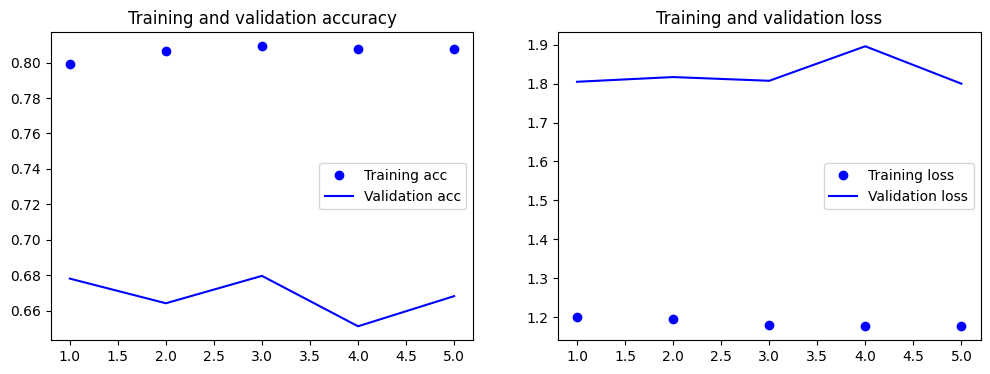

In [18]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the 'fit' method
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()